In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy.interpolate as sci
from scipy import signal
from datetime import datetime, timedelta

In [3]:
%matplotlib nbagg

In [4]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [5]:
longitudes = all_hour[0][1:]
latitudes = all_hour[1][1:]

coordinates = []

for i in range(len(longitudes)):
    a = "(" + str(round(latitudes[i],3)) + "\u00B0N, " + str(round(longitudes[i], 3)) + "\u00B0E)"
    coordinates.append(a)

In [6]:
all_hour_reshaped = np.transpose(all_hour[3:])

In [7]:
hour_times = all_hour_reshaped[0]
all_hour_stations = all_hour_reshaped[1:]

In [8]:
epoch = datetime(1, 1, 1)
hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in hour_times]

In [9]:
#len(coordinates), len(hour_time_pretty), len(np.array(range(5, int(1.3*len(coordinates)), 9)))
#factor= int(len(hour_time_pretty)/len(coordinates))
#hour_time_pretty[factor*5: factor*int(1.3*len(coordinates)): factor*7]
#hour_time_pretty[0], hour_time_pretty[-1]

<IPython.core.display.Javascript object>


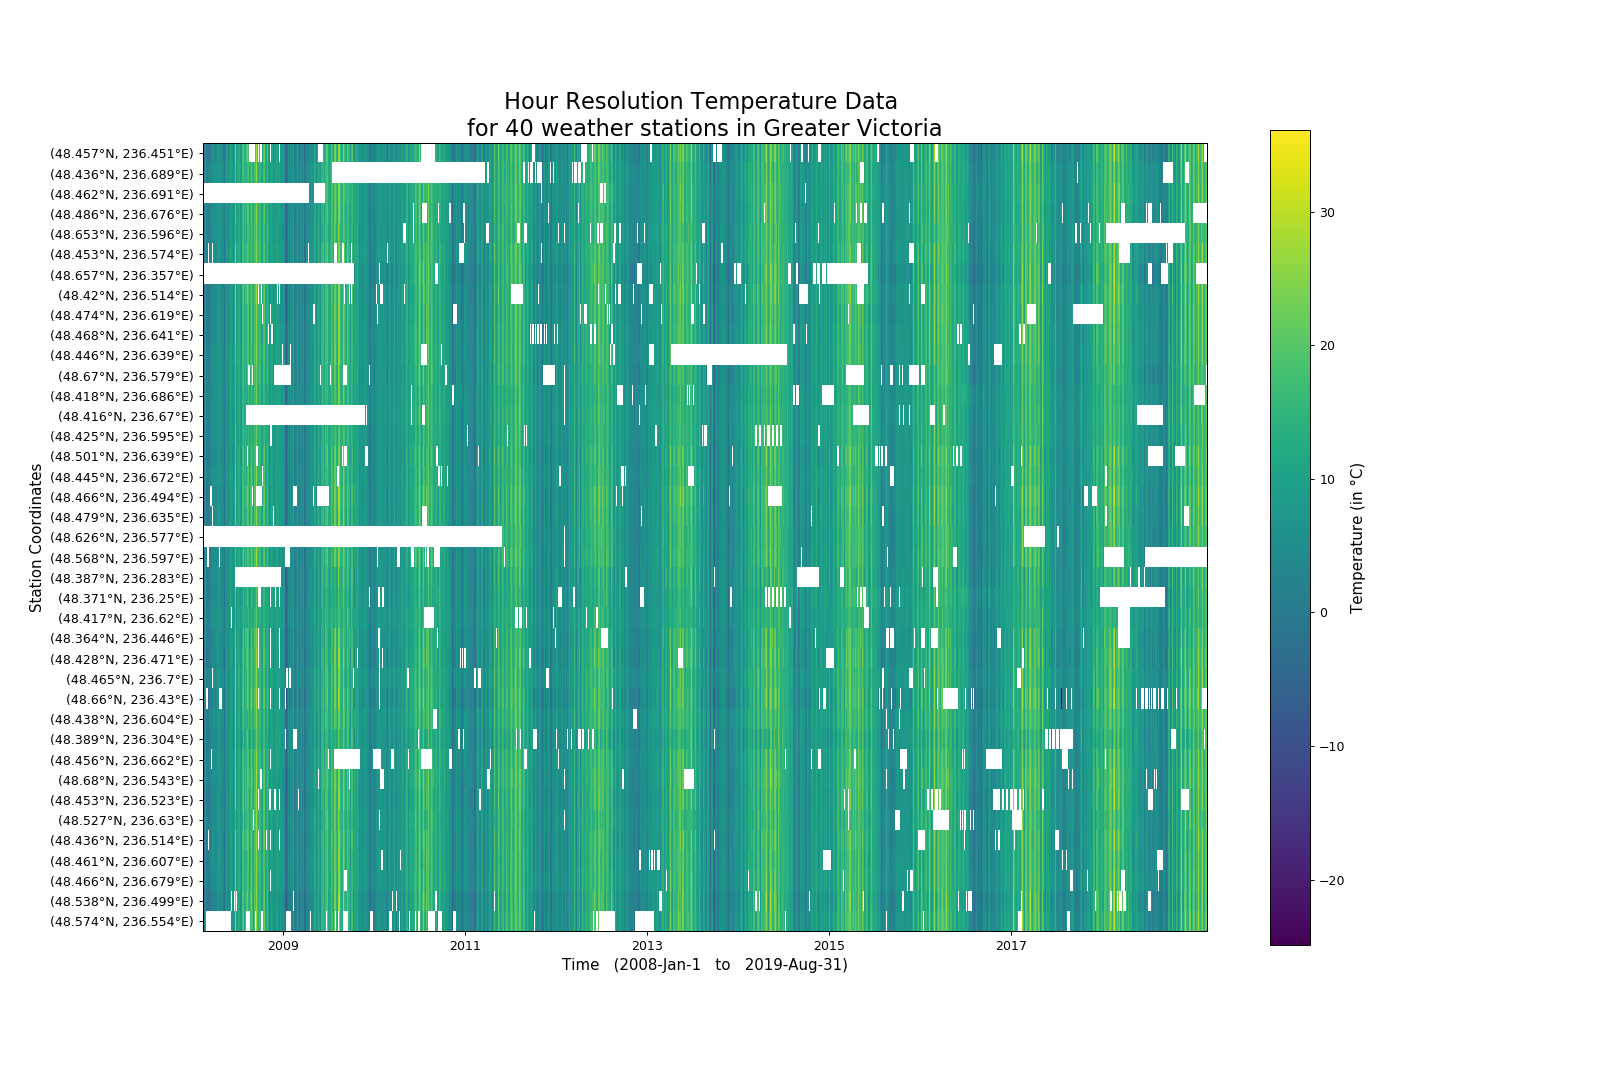

In [10]:
plt.close()

#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

plt.figure(figsize=(18, 12))
plt.imshow(all_hour_stations, extent=(1, 1.3*len(coordinates), 0, len(coordinates)), interpolation='nearest', origin='lower', cmap='viridis')
plt.xlabel('Time   (2008-Jan-1   to   2019-Aug-31)')
plt.xticks(np.array(range(5, int(1.3*len(coordinates)), 9)), [2009, 2011, 2013, 2015, 2017])
plt.yticks(np.array(range(1, len(coordinates) + 1)) - 0.5, coordinates)
plt.ylabel('Station Coordinates')
plt.title("Hour Resolution Temperature Data \nfor 40 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [11]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawHourData.eps")
plt.close()

In [12]:
coastline_coordinates = np.loadtxt("Data/Coastline.dat")

In [13]:
coastline_coordinates = np.transpose(coastline_coordinates)

In [14]:
station_loc_x = 110*np.cos(np.pi*latitudes/180)*(longitudes - 360)
station_loc_y = 110*latitudes

In [15]:
coast_loc_x = 110*np.cos(np.pi*coastline_coordinates[1]/180)*coastline_coordinates[0]
coast_loc_y = 110*coastline_coordinates[1]

In [22]:
scale_factor = np.cos(np.pi*latitudes[10]/180)

<IPython.core.display.Javascript object>


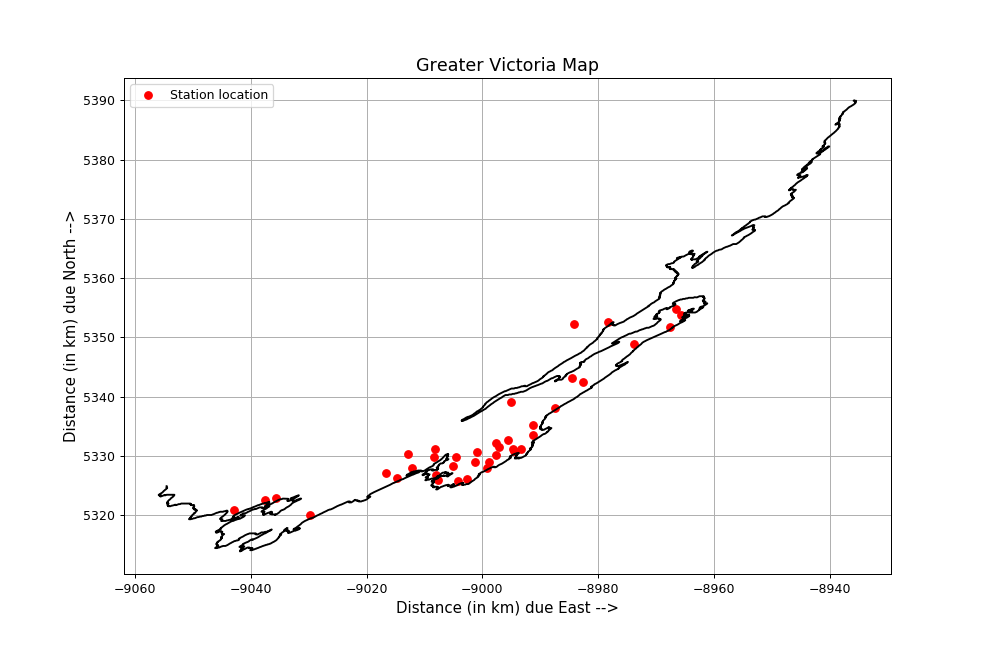

In [32]:
plt.close()

plt.rc('axes', titlesize=14)

plt.figure(figsize=(11, 11*scale_factor))
plt.plot(station_loc_x, station_loc_y, 'ro', label="Station location")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
#plt.plot(x_grid, y_grid, 'k.')
#plt.xlim(min(x_gridline), max(x_gridline))
#plt.ylim(min(y_gridline), max(y_gridline))
plt.grid(True)
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Greater Victoria Map")
plt.legend()

In [33]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/GreaterVictoriaMap.eps")
plt.close()

In [23]:
x_gridline = np.linspace(min(station_loc_x), max(station_loc_x), 50)
y_gridline = np.linspace(min(station_loc_y), max(station_loc_y), int(50*scale_factor))

x_grid, y_grid = np.meshgrid(x_gridline, y_gridline)